# Chapter 9 - Statistics and Probability with Python

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import warnings
#warnings.filterwarnings("ignore")

### Permutations and combinations

**Question: Find the number of ways in which an ice cream sundae containing three flavors can be created out of a total of five flavors.**

Answer: Let the five flavors be A, B, C, D, and E. Working out this problem manually, the following combinations can be obtained:

    A, B, C
    B, C, D
    A, C, D
    A, B, D
    C, D, E
    B, D, E
    A, B, E
    A, D, E
    A, C, E
    B, C, E

    (5C3 = 10)

    1. Select three flavors from five in 5C3 ways
    2. Now arrange the three items in 3! ways
    3. Multiply the results obtained in step 1 and step 2.

       Total number of permutations = 5C3 ∗ 3 ! = 60

### Probability

**Question: In an experiment, a die is rolled twice. Find the probability that the numbers obtained in the two throws add up to 10.**

Solution:

    Event A: The first die is rolled.
    Event B: The second die is rolled.

    Event X: {4,6}, {6,4}, and {5,5}

    P(X): Probability of obtaining a sum of 10 = Number of outcomes in event X/Total Sample Space 
    
    = 3/36 = 0.0833

### Bayes Theorem

**Question: Consider a scenario where a person has tested positive for an illness. This illness is known to impact about 1.2% of the population at any given time. The diagnostic test is known to have an accuracy of 85%, for people who have the illness. The test accuracy is 97% for people who do not have the illness. What is the probability that this person suffers from this illness, given that they have tested positive for it?**

    P(I) = 0.012       # Probability of having the illness
    P(N) = 1- 0.012    # Probability of not having the illness

    P(O|I) = 0.85      # Probability of testing positive given the person has the illness
    P(E|I) = 1 - 0.85  # Probaiblity of testing negative given the person has the illness

    P(E|N) = 0.97      # Probability of testing negative given the person has not the illness
    P(O|N) = 1 - 0.97  # Probability of testing positive given the person has not the illness

    P(I|0) ???

In [2]:
# Given values
P_I = 0.012       # Probability of having the illness 
P_N = 1 - P_I     # Probability of not having the illness

P_O_I = 0.85      # Probability of testing positive given the person has the illness  
P_E_I = 1 - 0.85  # Probaiblity of testing negative given the person has the illness (False Negative)

P_E_N = 0.97      # Probability of testing negative given the person has not the illness
P_O_N = 1 - 0.97  # Probability of testing positive given the person has not the illness (False Positive)

# Calculate P(O) - the total probability of testing positive
P_O = (P_O_I * P_I) + (P_O_N * P_N)               # P(O) = P(O|I)*P(I) + P(O|N)*P(N)

# Now, apply Bayes' theorem to calculate P(I|T)
P_I_O = (P_O_I * P_I) / P_O                       # P(I|O) = (P(O|I)*P(I)) / P(O)

# Output the result
print(round(P_I_O,4))

0.256


Using the Bayes theorem, we can now conclude that even with a positive medical test, this person only has a 25.6% chance of suffering from this illness.

**Question: What is the probability of a mail being spam, given that it contains the word “offer”? Available data indicates that 50% of all emails are spam mails. 9% of spam emails contain the word “offer,” and 0.4 % of ham emails contain the word “offer.”**

In [3]:
# Given values
P_S = 0.50      # Probability of an email being spam
P_H = 1 - P_S   # Probability of an email being not spam (ham)

P_O_S = 0.09    # Probability that the word "offer" appears in a spam email
P_O_H = 0.004   # Probability that the word "offer" appears in a ham email

# Calculate P(O) - the total probability that an email contains the word "offer"
P_O = (P_O_S * P_S) + (P_O_H * P_H)             # P(O) = P(O|S)*P(S) + P(O|H)*P(H)

# Now, apply Bayes' theorem to calculate P(S|O)
P_S_O = (P_O_S * P_S) / P_O                     # P(S|O) = (P(O|S)*P(S)) / P(O)

# Output the result
print(round(P_S_O,4))

0.9574


In other words, the probability of the mail being a spam mail given that it has the word “offer” is 95.74%.

### Probability Distributions

**Question: The metro rail company surveys eight senior citizens traveling in a subway train about their satisfaction with the new safety features introduced in the subway trains. Each response has only two values: yes or no. Let us assume that the probability of a “yes” response is 0.6, and the probability of a “no” response is 0.4 based on historical survey.**

    Calculate the probability that:

    1. Exactly three people are satisfied with the metro’s new safety features
    2. Fewer than five people are satisfied

In [4]:
import scipy.stats as stats

# Given values
n = 8        # Number of trials (people surveyed)
p = 0.6      # Probability of success (satisfaction)
r_exact = 3  # Number of people satisfied (for exactly 3)

# 1. Probability that exactly 3 people are satisfied
prob_exact_3 = stats.binom.pmf(r_exact, n, p)                                         # PMF for exactly 3 successes
print(f"Probability that exactly 3 people are satisfied: {prob_exact_3:.4f}")

# 2. Probability that fewer than 5 people are satisfied (i.e., sum of PMFs for 0, 1, 2, 3, and 4)
prob_fewer_than_5 = stats.binom.cdf(4, n, p)                                          # CDF for fewer than 5 (cumulative probability)
print(f"Probability that fewer than 5 people are satisfied: {prob_fewer_than_5:.4f}")

Probability that exactly 3 people are satisfied: 0.1239
Probability that fewer than 5 people are satisfied: 0.4059


### Poisson Distribution

**Question: In a subway station, the average number of ticket-vending machines out of operation is two. Assuming that the number of machines out of operation follows a Poisson distribution, calculate the probability that a given point in time:**

    1. Exactly three machines are out of operation
    2. More than two machines are out of operation

In [5]:
import scipy.stats as stats

# Given values
lambda_ = 2  # Average number of machines out of operation

# 1. Probability that exactly 3 machines are out of operation
prob_exact_3 = stats.poisson.pmf(3, lambda_)                                           # PMF for exactly 3
print(f"Probability that exactly 3 machines are out of operation: {prob_exact_3:.4f}")

# 2. Probability that more than 2 machines are out of operation
# We can use the complement of P(0), P(1), and P(2) (i.e., P(X > 2) = 1 - P(X <= 2))
prob_more_than_2 = 1 - stats.poisson.cdf(2, lambda_)                                   # CDF for P(X <= 2), so we take 1 - CDF
print(f"Probability that more than 2 machines are out of operation: {prob_more_than_2:.4f}")

Probability that exactly 3 machines are out of operation: 0.1804
Probability that more than 2 machines are out of operation: 0.3233


### Standard Normal Distribution

**Question: An IT team in a software company is inspecting some laptops. The team needs to select the top 1% of the laptops, with the criterion being the fastest boot times. The average boot time is 7 seconds, with a standard deviation of 0.5 seconds. What would be the cutoff boot time necessary for selection?**

In [6]:
import scipy.stats as stats

# Given values
mean = 7           # Average boot time in seconds
std_dev = 0.5      # Standard deviation in seconds
percentile = 0.01  # Top 1% (we are interested in the 1st percentile, so we use 0.01)

# Calculate the cutoff boot time for the top 1%
cutoff_time = stats.norm.ppf(percentile, loc=mean, scale=std_dev)

# Output the result
print(f"The cutoff boot time to select the top 1% of the fastest laptops is: {cutoff_time:.4f} seconds")

The cutoff boot time to select the top 1% of the fastest laptops is: 5.8368 seconds


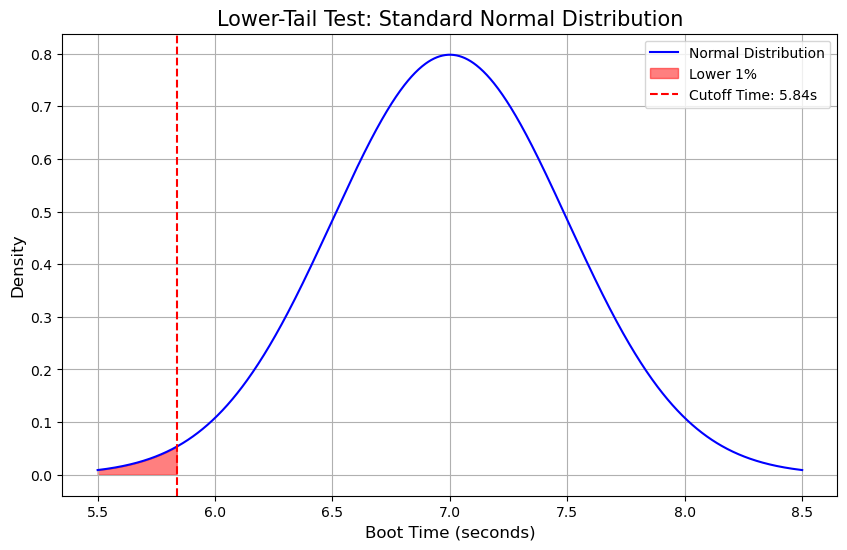

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Given values
mean = 7           # Average boot time in seconds
std_dev = 0.5      # Standard deviation in seconds
percentile = 0.01  # Top 1% corresponds to 1st percentile

# Calculate the cutoff boot time for the top 1%
cutoff_time = stats.norm.ppf(percentile, loc=mean, scale=std_dev)

# Generate values for the normal distribution curve
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)  # Create a range of x values
y = stats.norm.pdf(x, loc=mean, scale=std_dev)             # Get the corresponding y values (probability density function)

# Plot the normal distribution curve
plt.figure(figsize=(10,6))
plt.plot(x, y, label='Normal Distribution', color='blue')

# Shade the lower 1% area (left tail)
x_fill = np.linspace(mean - 3*std_dev, cutoff_time, 1000)
y_fill = stats.norm.pdf(x_fill, loc=mean, scale=std_dev)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label='Lower 1%')

# Add vertical line for cutoff time
plt.axvline(x=cutoff_time, color='red', linestyle='--', label=f'Cutoff Time: {cutoff_time:.2f}s')

# Labels and title
plt.title('Lower-Tail Test: Standard Normal Distribution', fontsize=15)
plt.xlabel('Boot Time (seconds)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

**Question: A company manufactures tube lights, where the life (in hours) of these tube lights follows a normal distribution with a mean of 900 (hrs) and a standard deviation of 150 (hrs). Calculate the following:**

    (1) The proportion of tube lights that fail within the first 750 hours
    (2) The proportion of tube lights that fail between 800 and 1100 hours
    (3) After how many hours would 20% of the tube lights fail?

In [8]:
import scipy.stats as stats

# Given values
mean = 900     # Mean life of tube lights in hours
std_dev = 150  # Standard deviation of tube light life in hours

# 1. Proportion of tube lights that fail within the first 750 hours
prob_less_than_750 = stats.norm.cdf(750, loc=mean, scale=std_dev)
print(f"Proportion of tube lights that fail within the first 750 hours: {prob_less_than_750:.4f}")

# 2. Proportion of tube lights that fail between 800 and 1100 hours
prob_between_800_1100 = stats.norm.cdf(1100, loc=mean, scale=std_dev) - stats.norm.cdf(800, loc=mean, scale=std_dev)
print(f"Proportion of tube lights that fail between 800 and 1100 hours: {prob_between_800_1100:.4f}")

# 3. After how many hours would 20% of the tube lights fail?
hours_20_percent_fail = stats.norm.ppf(0.20, loc=mean, scale=std_dev)
print(f"After how many hours would 20% of the tube lights fail: {hours_20_percent_fail:.2f} hours")

Proportion of tube lights that fail within the first 750 hours: 0.1587
Proportion of tube lights that fail between 800 and 1100 hours: 0.6563
After how many hours would 20% of the tube lights fail: 773.76 hours


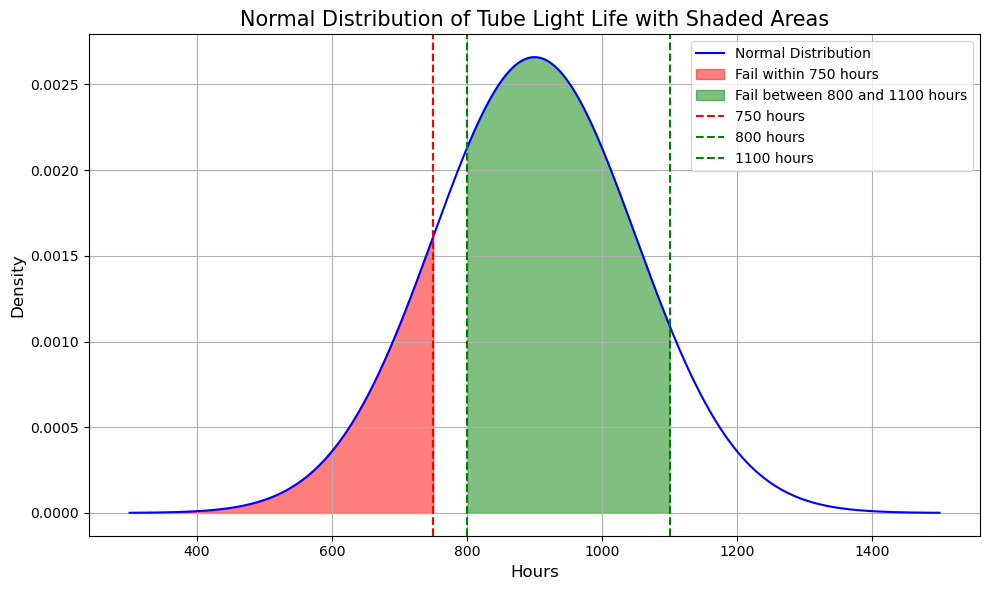

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Given values
mean = 900     # Mean life of tube lights in hours
std_dev = 150  # Standard deviation of tube light life in hours

# Generate values for the normal distribution curve
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)  # Create a range of x values (4 standard deviations from the mean)
y = stats.norm.pdf(x, loc=mean, scale=std_dev)             # Get the corresponding y values (PDF)

# Plot the normal distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution', color='blue')

# 1. Shade the area for tube lights that fail within the first 750 hours
x_fill_750 = np.linspace(mean - 4*std_dev, 750, 1000)
y_fill_750 = stats.norm.pdf(x_fill_750, loc=mean, scale=std_dev)
plt.fill_between(x_fill_750, y_fill_750, color='red', alpha=0.5, label='Fail within 750 hours')

# 2. Shade the area for tube lights that fail between 800 and 1100 hours
x_fill_800_1100 = np.linspace(800, 1100, 1000)
y_fill_800_1100 = stats.norm.pdf(x_fill_800_1100, loc=mean, scale=std_dev)
plt.fill_between(x_fill_800_1100, y_fill_800_1100, color='green', alpha=0.5, label='Fail between 800 and 1100 hours')

# Add vertical lines for 750, 800, and 1100
plt.axvline(x=750, color='red', linestyle='--', label='750 hours')
plt.axvline(x=800, color='green', linestyle='--', label='800 hours')
plt.axvline(x=1100, color='green', linestyle='--', label='1100 hours')

# Add labels and title
plt.title("Normal Distribution of Tube Light Life with Shaded Areas", fontsize=15)
plt.xlabel("Hours", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

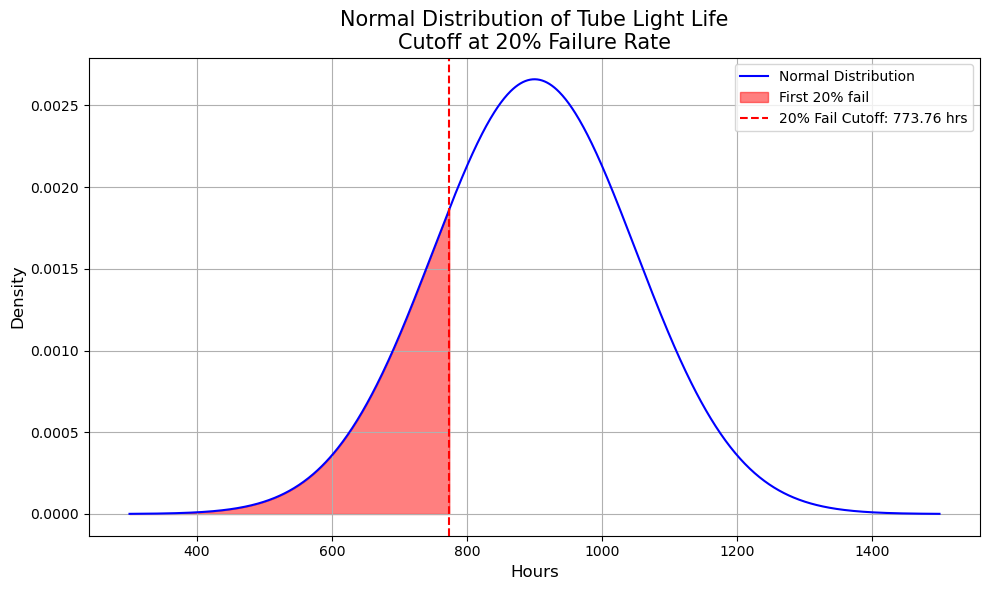

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Given values
mean = 900         # Mean life of tube lights in hours
std_dev = 150      # Standard deviation of tube light life in hours
percentile = 0.20  # 20% percentile

# Calculate the number of hours where 20% of tube lights fail
hours_20_percent_fail = stats.norm.ppf(percentile, loc=mean, scale=std_dev)

# Generate values for the normal distribution curve
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)  # Create a range of x values (4 standard deviations from the mean)
y = stats.norm.pdf(x, loc=mean, scale=std_dev)             # Get the corresponding y values (PDF)

# Plot the normal distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution', color='blue')

# Shade the area for the first 20% (left tail)
x_fill = np.linspace(mean - 4*std_dev, hours_20_percent_fail, 1000)
y_fill = stats.norm.pdf(x_fill, loc=mean, scale=std_dev)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label='First 20% fail')

# Add a vertical line for the 20th percentile cutoff
plt.axvline(x=hours_20_percent_fail, color='red', linestyle='--', label=f'20% Fail Cutoff: {hours_20_percent_fail:.2f} hrs')

# Add labels and title
plt.title(f"Normal Distribution of Tube Light Life\nCutoff at 20% Failure Rate", fontsize=15)
plt.xlabel("Hours", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### Measures of Central Tendency

**Question: The weight of children (in kgs) aged 3-7 in a primary school is as follows: 19, 23, 19, 18, 25, 16, 17, 19, 15, 23, 21, 23, 21, 11, 6. Let us calculate the measures of central tendency, dispersion, skewness, and kurtosis.**

In [11]:
import pandas as pd

# Given data
weights = [19, 23, 19, 18, 25, 16, 17, 19, 15, 23, 21, 23, 21, 11, 6]

# Create a pandas DataFrame
df = pd.DataFrame(weights, columns=['Weight'])

# 1. Measures of Central Tendency
mean_weight = df['Weight'].mean()     # Mean
median_weight = df['Weight'].median() # Median
mode_weight = df['Weight'].mode()[0]  # Mode

# 2. Measures of Dispersion
variance_weight = df['Weight'].var()                    # Variance
std_dev_weight = df['Weight'].std()                     # Standard deviation
range_weight = df['Weight'].max() - df['Weight'].min()  # Range

# 3. Skewness
skewness_weight = df['Weight'].skew()

# 4. Kurtosis
kurtosis_weight = df['Weight'].kurtosis()

# Output the results
print(f"Mean: {mean_weight:.2f}")
print(f"Median: {median_weight:.2f}")
print(f"Mode: {mode_weight}")
print(f"Variance: {variance_weight:.2f}")
print(f"Standard Deviation: {std_dev_weight:.2f}")
print(f"Range: {range_weight}")
print(f"Skewness: {skewness_weight:.2f}")
print(f"Kurtosis: {kurtosis_weight:.2f}")

Mean: 18.40
Median: 19.00
Mode: 19
Variance: 24.97
Standard Deviation: 5.00
Range: 19
Skewness: -1.16
Kurtosis: 1.54


### Estimates and Confidence Intervals

**Question: A sample (consisting of ten subjects) is taken from a certain population of students. The grade point averages of these students are normally distributed. The population standard deviation is not known. Calculate the 95% confidence interval for the population mean (grade point average for the whole student population), based on the following sample values: 3.1, 2.9, 3.2, 3.4, 3.7, 3.9, 3.9, 2.8, 3.4, 3.6.**

In [12]:
import numpy as np
import scipy.stats as stats

# Given sample data
sample = [3.1, 2.9, 3.2, 3.4, 3.7, 3.9, 3.9, 2.8, 3.4, 3.6]

# Sample statistics
n = len(sample)  # Sample size
mean_sample = np.mean(sample)        # Sample mean
std_sample = np.std(sample, ddof=1)  # Sample standard deviation (ddof=1 for sample)

# 95% confidence level
confidence_level = 0.95
alpha = 1 - confidence_level
df = n - 1                           # Degrees of freedom

# Critical t-value
t_critical = stats.t.ppf(1 - alpha/2, df)

# Margin of error
margin_of_error = t_critical * (std_sample / np.sqrt(n))

# Confidence interval
confidence_interval = (mean_sample - margin_of_error, mean_sample + margin_of_error)

# Output the result
print(f"Sample Mean: {mean_sample:.2f}")
print(f"Sample Standard Deviation: {std_sample:.2f}")
print(f"Critical t-value: {t_critical:.3f}")
print(f"Margin of Error: {margin_of_error:.3f}")
print(f"95% Confidence Interval: {confidence_interval}")

Sample Mean: 3.39
Sample Standard Deviation: 0.39
Critical t-value: 2.262
Margin of Error: 0.279
95% Confidence Interval: (3.1110006165952773, 3.668999383404722)


### One-Sample Z-test

**Question: A local Italian restaurant has an average delivery time of 45 minutes with a standard deviation of 5 minutes. The restaurant has received some complaints from its customers and has decided to analyze the last 40 orders. The average delivery time for these 40 orders was found to be 48 minutes. Conduct the appropriate test at a significance level of 5% to decide whether the delivery times have increased.**

In [13]:
import scipy.stats as stats

# Given values
mu_0 = 45         # Population mean (assumed)
sigma = 5         # Population standard deviation
n = 40            # Sample size
sample_mean = 48  # Sample mean
alpha = 0.05      # Significance level

# 1. Calculate the z-score
z = (sample_mean - mu_0) / (sigma / (n ** 0.5))

# 2. Find the critical z-value for a one-tailed test at 5% significance
z_critical = stats.norm.ppf(1 - alpha)

# Output the z-score and critical z-value
print(f"Calculated z-score: {z:.3f}")
print(f"Critical z-value: {z_critical:.3f}")
print()

# 3. Compare the z-score with the critical z-value
if z > z_critical:
    print("Reject the null hypothesis: The delivery times have increased.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that delivery times have increased.")

Calculated z-score: 3.795
Critical z-value: 1.645

Reject the null hypothesis: The delivery times have increased.


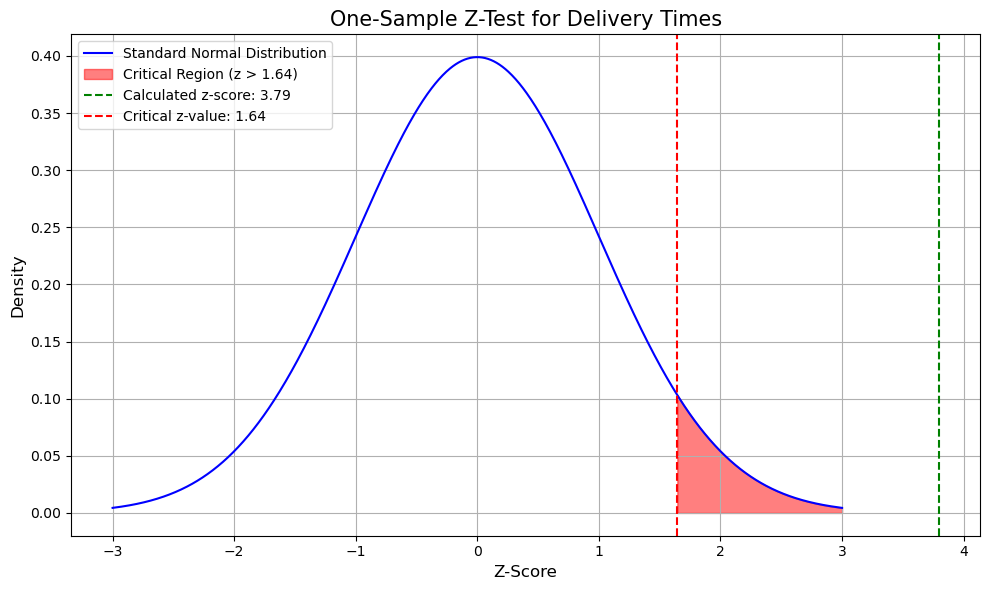

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Given values
mu_0 = 45         # Population mean
sigma = 5         # Population standard deviation
n = 40            # Sample size
sample_mean = 48  # Sample mean
alpha = 0.05      # Significance level

# 1. Calculate the z-score
z = (sample_mean - mu_0) / (sigma / (n ** 0.5))

# 2. Find the critical z-value for a one-tailed test
z_critical = stats.norm.ppf(1 - alpha)

# 3. Generate values for the standard normal distribution
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x, 0, 1)  # Standard normal distribution

# Plot the standard normal distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Standard Normal Distribution", color='blue')

# Shade the critical region (right tail)
x_fill = np.linspace(z_critical, 3, 1000)
y_fill = stats.norm.pdf(x_fill, 0, 1)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label=f'Critical Region (z > {z_critical:.2f})')

# Add vertical line for the calculated z-score
plt.axvline(z, color='green', linestyle='--', label=f'Calculated z-score: {z:.2f}')

# Add vertical line for the critical z-value
plt.axvline(z_critical, color='red', linestyle='--', label=f'Critical z-value: {z_critical:.2f}')

# Title and labels
plt.title('One-Sample Z-Test for Delivery Times', fontsize=15)
plt.xlabel('Z-Score', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

### Two-Sample Sample Z-test

**Question: An organization manufactures LED bulbs in two production units, A and B. The quality control team believes that the quality of production at unit A is better than that of B. Quality is measured by how long a bulb works. The team takes samples from both units to test this. The mean life of LED bulbs at units A and B are 1001.3 and 810.47, respectively. The sample sizes are 40 and 44. The population variances are known: s2A = 48127 and s2B = 59173.** 

**Conduct the appropriate test, at 5% significance level, to verify the claim of the quality control team.**

In [15]:
import numpy as np
import scipy.stats as stats

# Given values
mean_A = 1001.3  # Mean life of bulbs from unit A
mean_B = 810.47  # Mean life of bulbs from unit B
n_A = 40         # Sample size for unit A
n_B = 44         # Sample size for unit B
var_A = 48127    # Population variance for unit A
var_B = 59173    # Population variance for unit B
alpha = 0.05     # Significance level

# 1. Calculate the Z-statistic
z = (mean_A - mean_B) / np.sqrt((var_A / n_A) + (var_B / n_B))

# 2. Find the critical Z-value for a one-tailed test at 5% significance level
z_critical = stats.norm.ppf(1 - alpha)

# Output the Z-statistic and critical Z-value
print(f"Calculated Z-statistic: {z:.3f}")
print(f"Critical Z-value: {z_critical:.3f}")
print()

# 3. Conclusion
if z > z_critical:
    print("Reject the null hypothesis: The mean life of bulbs from unit A is greater than that from unit B.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that unit A's bulbs last longer.")

Calculated Z-statistic: 3.780
Critical Z-value: 1.645

Reject the null hypothesis: The mean life of bulbs from unit A is greater than that from unit B.


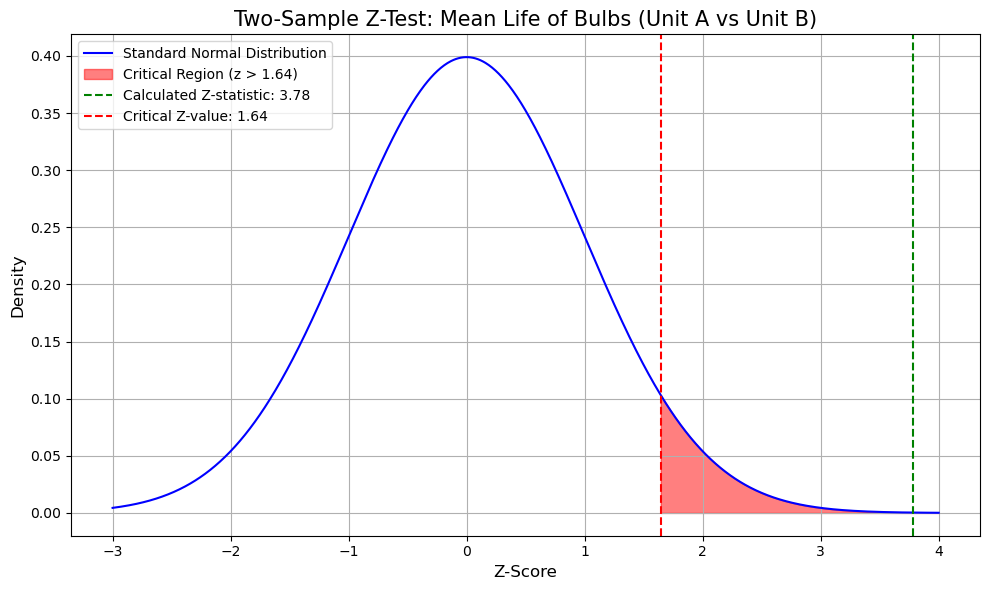

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Given values
mean_A = 1001.3  # Mean life of bulbs from unit A
mean_B = 810.47  # Mean life of bulbs from unit B
n_A = 40         # Sample size for unit A
n_B = 44         # Sample size for unit B
var_A = 48127    # Population variance for unit A
var_B = 59173    # Population variance for unit B
alpha = 0.05     # Significance level

# 1. Calculate the Z-statistic
z = (mean_A - mean_B) / np.sqrt((var_A / n_A) + (var_B / n_B))

# 2. Find the critical Z-value for a one-tailed test at 5% significance level
z_critical = stats.norm.ppf(1 - alpha)

# 3. Generate values for the standard normal distribution
x = np.linspace(-3, 4, 1000)
y = stats.norm.pdf(x, 0, 1)  # Standard normal distribution

# Plot the standard normal distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Standard Normal Distribution", color='blue')

# Shade the critical region (right tail)
x_fill = np.linspace(z_critical, 4, 1000)
y_fill = stats.norm.pdf(x_fill, 0, 1)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label=f'Critical Region (z > {z_critical:.2f})')

# Add vertical line for the calculated Z-statistic
plt.axvline(z, color='green', linestyle='--', label=f'Calculated Z-statistic: {z:.2f}')

# Add vertical line for the critical Z-value
plt.axvline(z_critical, color='red', linestyle='--', label=f'Critical Z-value: {z_critical:.2f}')

# Title and labels
plt.title('Two-Sample Z-Test: Mean Life of Bulbs (Unit A vs Unit B)', fontsize=15)
plt.xlabel('Z-Score', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

### Hypothesis Tests with Proportions

**Question: A survey collecting responses from a department in an organization might claim that 85% of people in the organization are satisfied with its policies. Historically the satisfaction rate has been 82%. Here, we are comparing a percentage or a proportion taken from the sample with a percentage/proportion from the population. The following are some of the characteristics of the sampling distribution of proportions:**

    • The sampling distribution of the proportions taken from the sample is approximately normal
    • The mean of this sampling distribution ( p ) = Population proportion (p)
    • Calculating the test statistic.

In [17]:
import numpy as np
import scipy.stats as stats

# Given values
p_sample = 0.85      # Sample proportion
p_population = 0.82  # Population proportion
n = 100              # Sample size (change this as per your sample size)
alpha = 0.05         # Significance level

# 1. Calculate the z-test statistic
standard_error = np.sqrt(p_population * (1 - p_population) / n)
z = (p_sample - p_population) / standard_error

# 2. Find the critical z-value for a two-tailed test at 5% significance level
z_critical = stats.norm.ppf(1 - alpha / 2)  # Two-tailed test, so we divide alpha by 2

# Output the z-statistic and critical z-value
print(f"Calculated Z-statistic: {z:.3f}")
print(f"Critical Z-value (for 5% significance level, two-tailed): {z_critical:.3f}")
print()

# 3. Conclusion
if abs(z) > z_critical:
    print("Reject the null hypothesis: There is a significant difference in satisfaction rates.")
else:
    print("Fail to reject the null hypothesis: No significant difference in satisfaction rates.")

Calculated Z-statistic: 0.781
Critical Z-value (for 5% significance level, two-tailed): 1.960

Fail to reject the null hypothesis: No significant difference in satisfaction rates.


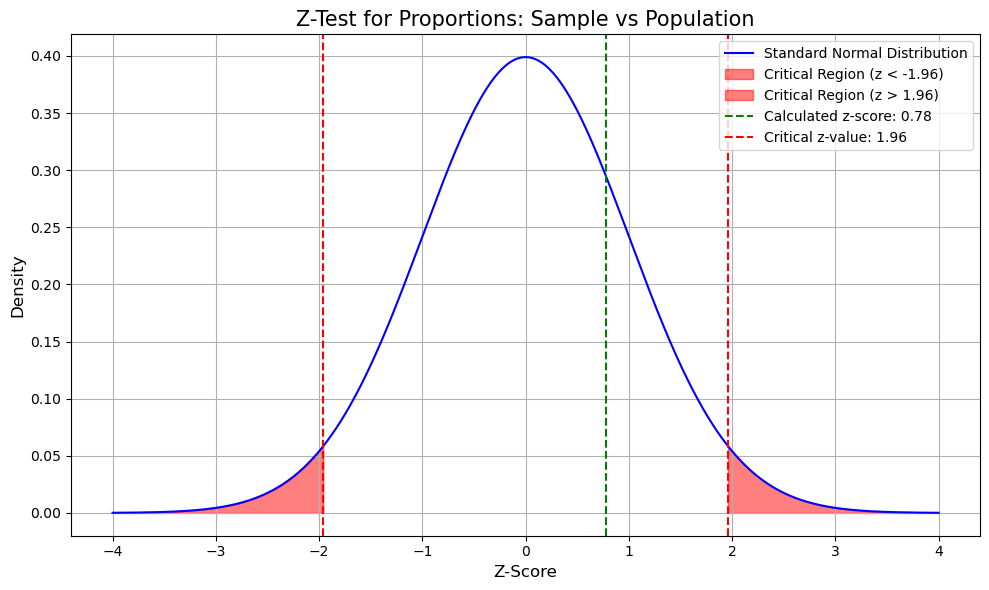

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Given values
p_sample = 0.85      # Sample proportion
p_population = 0.82  # Population proportion
n = 100              # Sample size
alpha = 0.05         # Significance level

# 1. Calculate the z-test statistic
standard_error = np.sqrt(p_population * (1 - p_population) / n)
z = (p_sample - p_population) / standard_error

# 2. Find the critical z-value for a two-tailed test at 5% significance level
z_critical = stats.norm.ppf(1 - alpha / 2)  # Two-tailed test

# 3. Generate values for the standard normal distribution
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)  # Standard normal distribution

# Plot the standard normal distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Standard Normal Distribution", color='blue')

# Shade the critical regions (two tails)
x_fill_left = np.linspace(-4, -z_critical, 1000)
y_fill_left = stats.norm.pdf(x_fill_left, 0, 1)
plt.fill_between(x_fill_left, y_fill_left, color='red', alpha=0.5, label=f'Critical Region (z < -{z_critical:.2f})')

x_fill_right = np.linspace(z_critical, 4, 1000)
y_fill_right = stats.norm.pdf(x_fill_right, 0, 1)
plt.fill_between(x_fill_right, y_fill_right, color='red', alpha=0.5, label=f'Critical Region (z > {z_critical:.2f})')

# Add vertical line for the calculated z-score
plt.axvline(z, color='green', linestyle='--', label=f'Calculated z-score: {z:.2f}')

# Add vertical lines for the critical z-values
plt.axvline(z_critical, color='red', linestyle='--', label=f'Critical z-value: {z_critical:.2f}')
plt.axvline(-z_critical, color='red', linestyle='--')

# Title and labels
plt.title('Z-Test for Proportions: Sample vs Population', fontsize=15)
plt.xlabel('Z-Score', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

**Question: It is known that 40% of the total customers are satisfied with the services provided by a mobile service center. The customer service department of this center decides to conduct a survey for assessing the current customer satisfaction rate. It surveys 100 of its customers and finds that only 30 out of the 100 customers are satisfied with its services. Conduct a hypothesis test at a 5% significance level to determine if the percentage of satisfied customers has reduced from the initial satisfaction level (40%).**

In [19]:
import numpy as np
import scipy.stats as stats

# Given values
p_sample = 30 / 100  # Sample proportion (30 out of 100 satisfied)
p_population = 0.40  # Population proportion (historical satisfaction rate)
n = 100              # Sample size
alpha = 0.05         # Significance level

# 1. Calculate the z-test statistic
standard_error = np.sqrt(p_population * (1 - p_population) / n)
z = (p_sample - p_population) / standard_error

# 2. Find the critical z-value for a one-tailed test at 5% significance level
z_critical = stats.norm.ppf(alpha)

# Output the Z-statistic and critical Z-value
print(f"Calculated Z-statistic: {z:.3f}")
print(f"Critical Z-value (for 5% significance level, one-tailed): {z_critical:.3f}")
print()

# 3. Conclusion
if z < z_critical:
    print("Reject the null hypothesis: The satisfaction rate has significantly reduced.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that the satisfaction rate has reduced.")

Calculated Z-statistic: -2.041
Critical Z-value (for 5% significance level, one-tailed): -1.645

Reject the null hypothesis: The satisfaction rate has significantly reduced.


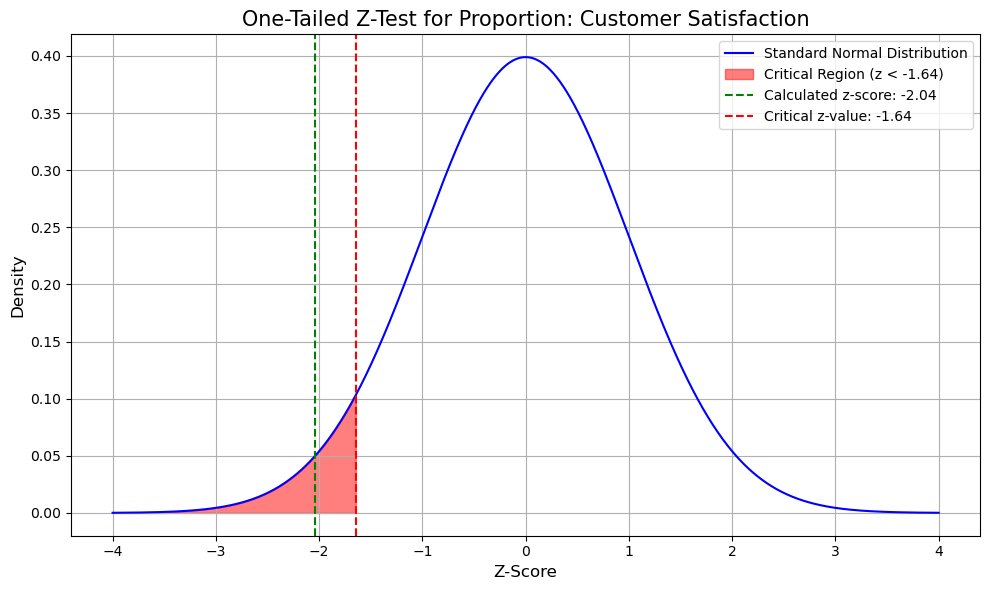

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Given values
p_sample = 30 / 100  # Sample proportion (30 out of 100 satisfied)
p_population = 0.40  # Population proportion (historical satisfaction rate)
n = 100              # Sample size
alpha = 0.05         # Significance level

# 1. Calculate the z-test statistic
standard_error = np.sqrt(p_population * (1 - p_population) / n)
z = (p_sample - p_population) / standard_error

# 2. Find the critical z-value for a one-tailed test at 5% significance level
z_critical = stats.norm.ppf(alpha)

# 3. Generate values for the standard normal distribution
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)  # Standard normal distribution

# Plot the standard normal distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Standard Normal Distribution", color='blue')

# Shade the critical region (left tail)
x_fill_left = np.linspace(-4, z_critical, 1000)
y_fill_left = stats.norm.pdf(x_fill_left, 0, 1)
plt.fill_between(x_fill_left, y_fill_left, color='red', alpha=0.5, label=f'Critical Region (z < {z_critical:.2f})')

# Add vertical line for the calculated z-score
plt.axvline(z, color='green', linestyle='--', label=f'Calculated z-score: {z:.2f}')

# Add vertical line for the critical z-value
plt.axvline(z_critical, color='red', linestyle='--', label=f'Critical z-value: {z_critical:.2f}')

# Title and labels
plt.title('One-Tailed Z-Test for Proportion: Customer Satisfaction', fontsize=15)
plt.xlabel('Z-Score', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

### Two-Sample Z-test for the Population Proportions

**Question: A ride-sharing company is investigating complaints by its drivers that some of the passengers (traveling with children) do not conform with child safety guidelines (for example, not bringing a child seat or not using the seat belt). The company undertakes surveys in two major cities. The surveys are collected independently, with one sample being taken from each city. From the data collected, it seems that the passengers in City
B are more noncompliant than those in City A. The law enforcement authority wants to know if the proportion of passengers conforming with child safety guidelines is different for the two cities. The data for the two cities is given in the following table:**

                                 City A         City B
    total surveyed                 200           230
    number of people compliant     110           106

**Conduct the appropriate test, at 5% significance level, to test the hypothesis.**

In [21]:
import numpy as np
import scipy.stats as stats

# Given data
n_A = 200  # Total surveyed in City A
n_B = 230  # Total surveyed in City B
x_A = 110  # Number of compliant passengers in City A
x_B = 106  # Number of compliant passengers in City B

# 1. Calculate sample proportions
p_A = x_A / n_A
p_B = x_B / n_B

# 2. Calculate the pooled proportion
p_pooled = (x_A + x_B) / (n_A + n_B)

# 3. Calculate the standard error
standard_error = np.sqrt(p_pooled * (1 - p_pooled) * (1/n_A + 1/n_B))

# 4. Calculate the Z-statistic
z = (p_A - p_B) / standard_error

# 5. Find the critical z-value for a two-tailed test at 5% significance level
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha / 2)

# Output the Z-statistic and critical Z-value
print(f"Calculated Z-statistic: {z:.3f}")
print(f"Critical Z-value (for 5% significance level, two-tailed): ±{z_critical:.3f}")
print()

# 6. Conclusion
if abs(z) > z_critical:
    print("Reject the null hypothesis: There is a significant difference in proportions between the two cities.")
else:
    print("Fail to reject the null hypothesis: No significant difference in proportions between the two cities.")

Calculated Z-statistic: 1.844
Critical Z-value (for 5% significance level, two-tailed): ±1.960

Fail to reject the null hypothesis: No significant difference in proportions between the two cities.


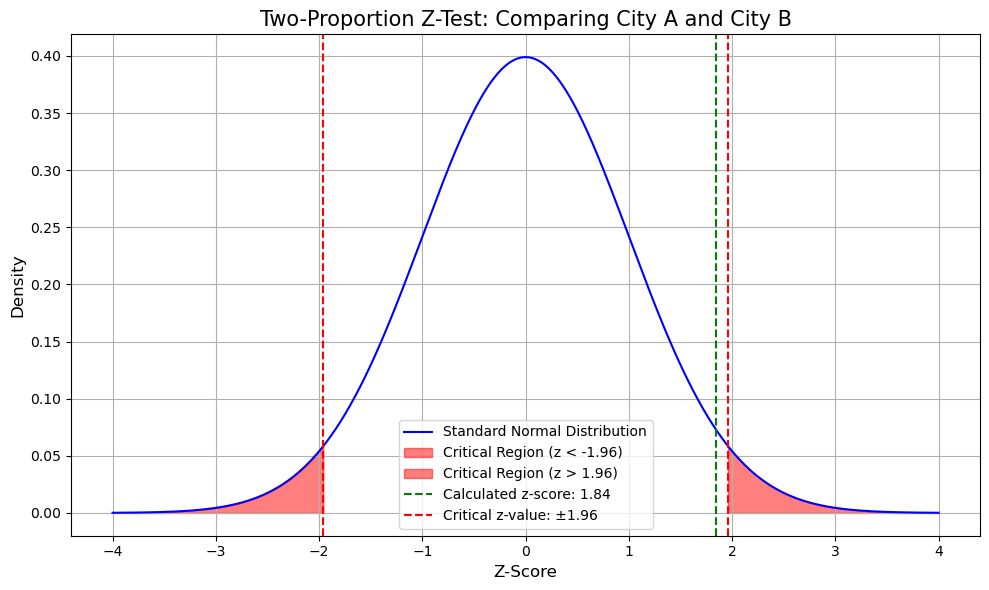

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Given data
n_A = 200  # Total surveyed in City A
n_B = 230  # Total surveyed in City B
x_A = 110  # Number of compliant passengers in City A
x_B = 106  # Number of compliant passengers in City B

# 1. Calculate sample proportions
p_A = x_A / n_A
p_B = x_B / n_B

# 2. Calculate the pooled proportion
p_pooled = (x_A + x_B) / (n_A + n_B)

# 3. Calculate the standard error
standard_error = np.sqrt(p_pooled * (1 - p_pooled) * (1/n_A + 1/n_B))

# 4. Calculate the Z-statistic
z = (p_A - p_B) / standard_error

# 5. Find the critical z-value for a two-tailed test at 5% significance level
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha / 2)

# 6. Generate values for the standard normal distribution
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)  # Standard normal distribution

# Plot the standard normal distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Standard Normal Distribution", color='blue')

# Shade the critical regions (two tails)
x_fill_left = np.linspace(-4, -z_critical, 1000)
y_fill_left = stats.norm.pdf(x_fill_left, 0, 1)
plt.fill_between(x_fill_left, y_fill_left, color='red', alpha=0.5, label=f'Critical Region (z < -{z_critical:.2f})')

x_fill_right = np.linspace(z_critical, 4, 1000)
y_fill_right = stats.norm.pdf(x_fill_right, 0, 1)
plt.fill_between(x_fill_right, y_fill_right, color='red', alpha=0.5, label=f'Critical Region (z > {z_critical:.2f})')

# Add vertical line for the calculated z-score
plt.axvline(z, color='green', linestyle='--', label=f'Calculated z-score: {z:.2f}')

# Add vertical lines for the critical z-values
plt.axvline(z_critical, color='red', linestyle='--', label=f'Critical z-value: ±{z_critical:.2f}')
plt.axvline(-z_critical, color='red', linestyle='--')

# Title and labels
plt.title('Two-Proportion Z-Test: Comparing City A and City B', fontsize=15)
plt.xlabel('Z-Score', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

### T-Distribution

**Question: A coaching institute, preparing students for an exam, has 200 students, and the average score of the students in the practice tests is 80. It takes a sample of nine students and records their scores; it seems that the average score has now increased. These are the scores of these ten students: 80, 87, 80, 75, 79, 78, 89, 84, 88. Conduct a hypothesis test at a 5% significance level to verify if there is a significant increase in the average score.**

In [23]:
import numpy as np
import scipy.stats as stats

# Given data
sample_scores = [80, 87, 80, 75, 79, 78, 89, 84, 88]
population_mean = 80  # Population mean (µ0)
alpha = 0.05          # Significance level

# 1. Calculate the sample mean and standard deviation
sample_mean = np.mean(sample_scores)
sample_std = np.std(sample_scores, ddof=1)  # ddof=1 for sample standard deviation
n = len(sample_scores)                      # Sample size

# 2. Calculate the t-statistic
t_statistic = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

# 3. Find the critical t-value for a one-tailed test at 5% significance level with n-1 degrees of freedom
t_critical = stats.t.ppf(1 - alpha, df=n-1)

# Output the T-statistic and critical T-value
print(f"Sample mean: {sample_mean:.2f}")
print(f"Sample standard deviation: {sample_std:.2f}")
print(f"\nCalculated T-statistic: {t_statistic:.3f}")
print(f"Critical T-value (for 5% significance level, one-tailed): {t_critical:.3f}")
print()

# 4. Conclusion
if t_statistic > t_critical:
    print("Reject the null hypothesis: There is significant evidence that the average score has increased.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that the average score has increased.")

Sample mean: 82.22
Sample standard deviation: 4.94

Calculated T-statistic: 1.348
Critical T-value (for 5% significance level, one-tailed): 1.860

Fail to reject the null hypothesis: No significant evidence that the average score has increased.


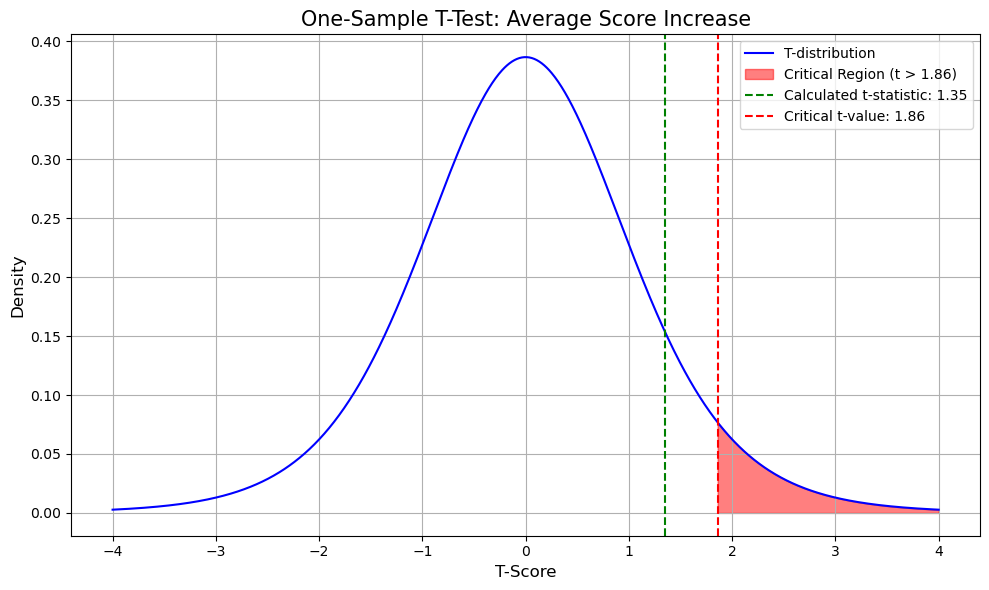

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Given data
sample_scores = [80, 87, 80, 75, 79, 78, 89, 84, 88]
population_mean = 80  # Population mean (µ0)
alpha = 0.05          # Significance level

# 1. Calculate the sample mean and standard deviation
sample_mean = np.mean(sample_scores)
sample_std = np.std(sample_scores, ddof=1)  # ddof=1 for sample standard deviation
n = len(sample_scores)                      # Sample size

# 2. Calculate the t-statistic
t_statistic = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

# 3. Find the critical t-value for a one-tailed test at 5% significance level with n-1 degrees of freedom
t_critical = stats.t.ppf(1 - alpha, df=n-1)

# 4. Generate t-distribution values
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df=n-1)  # T-distribution with n-1 degrees of freedom

# Plot the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="T-distribution", color='blue')

# Shade the critical region (right tail)
x_fill = np.linspace(t_critical, 4, 1000)
y_fill = stats.t.pdf(x_fill, df=n-1)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label=f'Critical Region (t > {t_critical:.2f})')

# Add vertical line for the calculated t-statistic
plt.axvline(t_statistic, color='green', linestyle='--', label=f'Calculated t-statistic: {t_statistic:.2f}')

# Add vertical line for the critical t-value
plt.axvline(t_critical, color='red', linestyle='--', label=f'Critical t-value: {t_critical:.2f}')

# Title and labels
plt.title('One-Sample T-Test: Average Score Increase', fontsize=15)
plt.xlabel('T-Score', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

**Question: A coaching institute has centers in two different cities. It takes a sample of ten students from each center and records their
scores, which are as follows:**

    Center A: 80, 87, 80, 75, 79, 78, 89, 84, 88
    Center B: 81, 74, 70, 73, 76, 73, 81, 82, 84
    
**Conduct a hypothesis test at a 5% significance level, and verify if there a significant difference in the average scores of the
students in these two centers.**

In [25]:
import numpy as np
import scipy.stats as stats

# Given data
scores_A = [80, 87, 80, 75, 79, 78, 89, 84, 88]  # Center A scores
scores_B = [81, 74, 70, 73, 76, 73, 81, 82, 84]  # Center B scores

# Calculate sample means and standard deviations
mean_A = np.mean(scores_A)
mean_B = np.mean(scores_B)
std_A = np.std(scores_A, ddof=1)  # Sample standard deviation for Center A
std_B = np.std(scores_B, ddof=1)  # Sample standard deviation for Center B
n_A = len(scores_A)
n_B = len(scores_B)

# 1. Calculate the standard error of the difference between means
standard_error = np.sqrt((std_A**2 / n_A) + (std_B**2 / n_B))

# 2. Calculate the t-statistic
t_statistic = (mean_A - mean_B) / standard_error

# 3. Find the critical t-value for a two-tailed test at a 5% significance level with n_A + n_B - 2 degrees of freedom
degrees_of_freedom = n_A + n_B - 2
t_critical = stats.t.ppf(1 - 0.05 / 2, df=degrees_of_freedom)

# Output the T-statistic and critical T-value
print(f"Mean of Center A: {mean_A:.2f}")
print(f"Mean of Center B: {mean_B:.2f}")
print(f"\nSample standard deviation (A): {std_A:.2f}")
print(f"Sample standard deviation (B): {std_B:.2f}")
print(f"\nCalculated T-statistic: {t_statistic:.3f}")
print(f"Critical T-value (for 5% significance level, two-tailed): ±{t_critical:.3f}")
print()

# 4. Conclusion
if abs(t_statistic) > t_critical:
    print("Reject the null hypothesis: There is a significant difference in the average scores between Center A and Center B.")
else:
    print("Fail to reject the null hypothesis: No significant difference in the average scores between Center A and Center B.")

Mean of Center A: 82.22
Mean of Center B: 77.11

Sample standard deviation (A): 4.94
Sample standard deviation (B): 4.96

Calculated T-statistic: 2.189
Critical T-value (for 5% significance level, two-tailed): ±2.120

Reject the null hypothesis: There is a significant difference in the average scores between Center A and Center B.


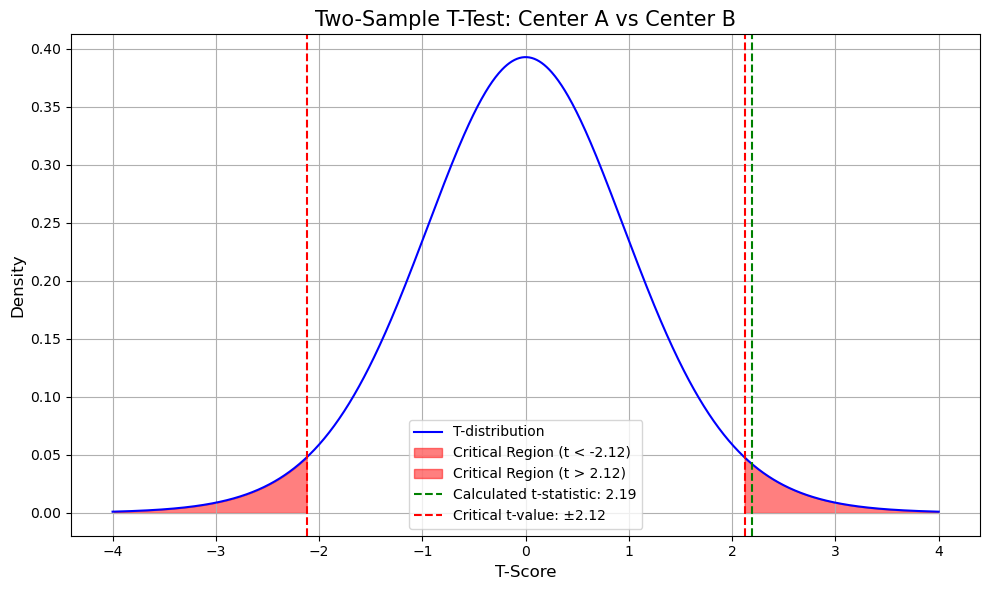

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Given data
scores_A = [80, 87, 80, 75, 79, 78, 89, 84, 88]  # Center A scores
scores_B = [81, 74, 70, 73, 76, 73, 81, 82, 84]  # Center B scores

# Calculate sample means and standard deviations
mean_A = np.mean(scores_A)        # Mean of scores from Center A
mean_B = np.mean(scores_B)        # Mean of scores from Center B
std_A = np.std(scores_A, ddof=1)  # Sample standard deviation for Center A
std_B = np.std(scores_B, ddof=1)  # Sample standard deviation for Center B
n_A = len(scores_A)               # Number of students in Center A (sample size)
n_B = len(scores_B)               # Number of students in Center B (sample size)

# 1. Calculate the standard error of the difference between means
standard_error = np.sqrt((std_A**2 / n_A) + (std_B**2 / n_B))

# 2. Calculate the t-statistic
t_statistic = (mean_A - mean_B) / standard_error

# 3. Find the critical t-value for a two-tailed test at a 5% significance level with n_A + n_B - 2 degrees of freedom
degrees_of_freedom = n_A + n_B - 2
t_critical = stats.t.ppf(1 - 0.05 / 2, df=degrees_of_freedom)

# 4. Generate t-distribution values
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df=degrees_of_freedom)  # T-distribution with n_A + n_B - 2 degrees of freedom

# Plot the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="T-distribution", color='blue')

# Shade the critical regions (both tails)
x_fill_left = np.linspace(-4, -t_critical, 1000)
y_fill_left = stats.t.pdf(x_fill_left, df=degrees_of_freedom)
plt.fill_between(x_fill_left, y_fill_left, color='red', alpha=0.5, label=f'Critical Region (t < -{t_critical:.2f})')

x_fill_right = np.linspace(t_critical, 4, 1000)
y_fill_right = stats.t.pdf(x_fill_right, df=degrees_of_freedom)
plt.fill_between(x_fill_right, y_fill_right, color='red', alpha=0.5, label=f'Critical Region (t > {t_critical:.2f})')

# Add vertical line for the calculated t-statistic
plt.axvline(t_statistic, color='green', linestyle='--', label=f'Calculated t-statistic: {t_statistic:.2f}')

# Add vertical lines for the critical t-values
plt.axvline(t_critical, color='red', linestyle='--', label=f'Critical t-value: ±{t_critical:.2f}')
plt.axvline(-t_critical, color='red', linestyle='--')

# Title and labels
plt.title('Two-Sample T-Test: Center A vs Center B', fontsize=15)
plt.xlabel('T-Score', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

**Question: The coaching institute is conducting a special program to improve the performance of the students. The scores of the same set of students are compared before and after the special program. Conduct a hypothesis test at a 5% significance level to verify if the scores have improved because of this program.**

    scores_A = [80, 87, 80, 75, 79, 78, 89, 84, 88] 
    scores_B = [81, 89, 83, 81, 79, 82, 90, 82, 90] 

In [27]:
import numpy as np
import scipy.stats as stats

# Given data: Scores before and after the program
scores_before = [80, 87, 80, 75, 79, 78, 89, 84, 88]  # Scores before the program
scores_after = [81, 89, 83, 81, 79, 82, 90, 82, 90]   # Scores after the program

# 1. Calculate the differences between the scores
differences = np.array(scores_after) - np.array(scores_before)

# 2. Calculate the mean and standard deviation of the differences
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)  # Sample standard deviation
n = len(differences)  # Number of paired observations

# 3. Calculate the t-statistic
t_statistic = mean_diff / (std_diff / np.sqrt(n))

# 4. Find the critical t-value for a one-tailed test at a 5% significance level with n-1 degrees of freedom
t_critical = stats.t.ppf(1 - 0.05, df=n-1)

# Output the T-statistic and critical T-value
print(f"Mean of differences: {mean_diff:.2f}")
print(f"Sample standard deviation of differences: {std_diff:.2f}")
print(f"\nCalculated T-statistic: {t_statistic:.3f}")
print(f"Critical T-value (for 5% significance level, one-tailed): {t_critical:.3f}")
print()

# 5. Conclusion
if t_statistic > t_critical:
    print("Reject the null hypothesis: There is significant evidence that the scores have improved after the program.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that the scores have improved after the program.")

Mean of differences: 1.89
Sample standard deviation of differences: 2.32

Calculated T-statistic: 2.447
Critical T-value (for 5% significance level, one-tailed): 1.860

Reject the null hypothesis: There is significant evidence that the scores have improved after the program.


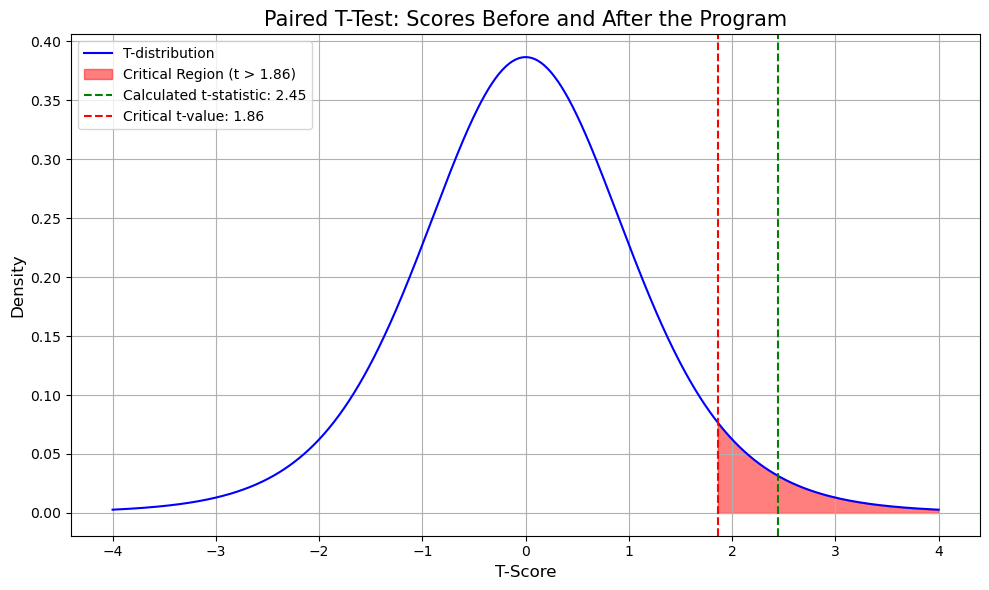

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Given data: Scores before and after the program
scores_before = [80, 87, 80, 75, 79, 78, 89, 84, 88]  # Scores before the program
scores_after = [81, 89, 83, 81, 79, 82, 90, 82, 90]   # Scores after the program

# 1. Calculate the differences between the scores
differences = np.array(scores_after) - np.array(scores_before)

# 2. Calculate the mean and standard deviation of the differences
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)  # Sample standard deviation
n = len(differences)                    # Number of paired observations

# 3. Calculate the t-statistic
t_statistic = mean_diff / (std_diff / np.sqrt(n))

# 4. Find the critical t-value for a one-tailed test at a 5% significance level with n-1 degrees of freedom
t_critical = stats.t.ppf(1 - 0.05, df=n-1)

# Generate t-distribution values for plotting
x = np.linspace(-4, 4, 1000)  # Values along the x-axis for t-distribution
y = stats.t.pdf(x, df=n-1)    # T-distribution with n-1 degrees of freedom

# Plot the t-distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="T-distribution", color='blue')

# Shade the critical region (right tail)
x_fill = np.linspace(t_critical, 4, 1000)
y_fill = stats.t.pdf(x_fill, df=n-1)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label=f'Critical Region (t > {t_critical:.2f})')

# Add vertical line for the calculated t-statistic
plt.axvline(t_statistic, color='green', linestyle='--', label=f'Calculated t-statistic: {t_statistic:.2f}')

# Add vertical line for the critical t-value
plt.axvline(t_critical, color='red', linestyle='--', label=f'Critical t-value: {t_critical:.2f}')

# Title and labels
plt.title('Paired T-Test: Scores Before and After the Program', fontsize=15)
plt.xlabel('T-Score', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

### ANOVA

**Question: A few agricultural research scientists have planted a new variety of cotton called “AB cotton.” They have used three different fertilizers – A, B, and C – for three separate plots of this variety. The researchers want to find out if the yield varies with the type of fertilizer used. Yields in bushels per acre are mentioned in the below table. Conduct an ANOVA test at a 5% level of significance to see if the researchers can conclude that there is a difference in yields.**

    Fertilizer A           Fertilizer B            Fertilizer C
        40                     45                       55
        30                     35                       40
        35                     55                       30
        45                     25                       20

In [29]:
import scipy.stats as stats
import pandas as pd

# Given data: Yields for each fertilizer type
fertilizer_A = [40, 30, 35, 45]
fertilizer_B = [45, 35, 55, 25]
fertilizer_C = [55, 40, 30, 20]

# Creating a DataFrame
data = pd.DataFrame({
    'Fertilizer_A': fertilizer_A,
    'Fertilizer_B': fertilizer_B,
    'Fertilizer_C': fertilizer_C
})

# Conducting one-way ANOVA
f_statistic, p_value = stats.f_oneway(fertilizer_A, fertilizer_B, fertilizer_C)

# Output the F-statistic and p-value
print(f"F-statistic: {f_statistic:.3f}")
print(f"P-value: {p_value:.3f}")
print()

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is significant evidence that the mean yields differ between the fertilizers.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that the mean yields differ between the fertilizers.")

F-statistic: 0.101
P-value: 0.905

Fail to reject the null hypothesis: No significant evidence that the mean yields differ between the fertilizers.


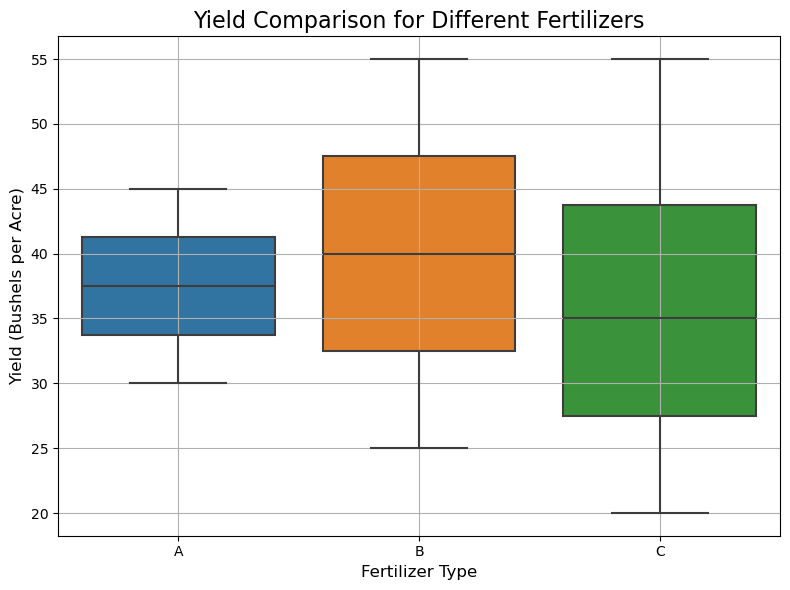

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Given data: Yields for each fertilizer type
fertilizer_A = [40, 30, 35, 45]
fertilizer_B = [45, 35, 55, 25]
fertilizer_C = [55, 40, 30, 20]

# Creating a DataFrame for visualization
data = pd.DataFrame({
    'Fertilizer': ['A']*len(fertilizer_A) + ['B']*len(fertilizer_B) + ['C']*len(fertilizer_C),
    'Yield': fertilizer_A + fertilizer_B + fertilizer_C
})

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fertilizer', y='Yield', data=data)

# Add a title and labels
plt.title('Yield Comparison for Different Fertilizers', fontsize=16)
plt.xlabel('Fertilizer Type', fontsize=12)
plt.ylabel('Yield (Bushels per Acre)', fontsize=12)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### Chi-Square test of association

**Question: A career counseling service guides students to help them understand their strengths and weaknesses so that they make appropriate career choices. They would like to assess if there is an association between the gender of a student and the career he or she chooses. The following table shows the number of males and females, and the careers (given by career IDs like I001, I002, etc.) they choose to pursue.**

    Career Males Females Total
    I001    41     79     120
    I002    32     28      60
    I003    58     78     130
    I004    59     31      90

In [31]:
import numpy as np
import scipy.stats as stats

# Given data: Observed frequencies
observed = np.array([[41, 79],   # Career I001
                     [32, 28],   # Career I002
                     [58, 78],   # Career I003
                     [59, 31]])  # Career I004

# Conduct the Chi-Square test of independence
chi2_stat, p_val, dof, expected = stats.chi2_contingency(observed)

# Output the results
print(f"Chi-Square Statistic: {chi2_stat:.3f}")
print(f"P-value: {p_val:.3f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)
print()

# Conclusion
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant association between gender and career choice.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between gender and career choice.")

Chi-Square Statistic: 22.379
P-value: 0.000
Degrees of Freedom: 3

Expected Frequencies:
[[56.15763547 63.84236453]
 [28.07881773 31.92118227]
 [63.6453202  72.3546798 ]
 [42.1182266  47.8817734 ]]

Reject the null hypothesis: There is a significant association between gender and career choice.


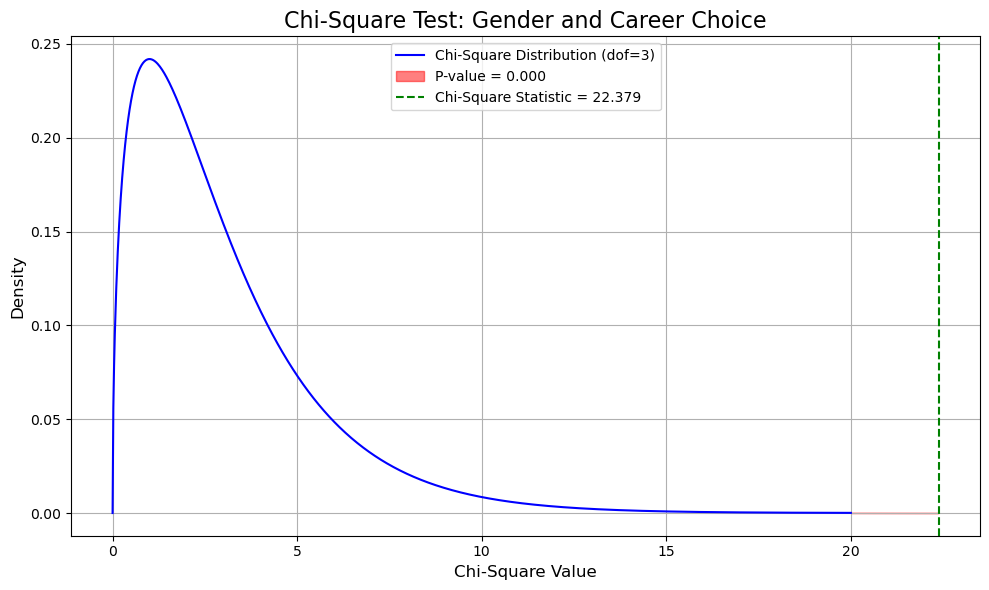

In [32]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given data: Observed frequencies
observed = np.array([[41, 79], [32, 28], [58, 78], [59, 31]])

# Conduct the Chi-Square test of independence
chi2_stat, p_val, dof, expected = stats.chi2_contingency(observed)

# Generate values for the Chi-Square distribution
x = np.linspace(0, 20, 1000)   # X-axis values
y = stats.chi2.pdf(x, dof)     # Chi-Square distribution with 'dof' degrees of freedom

# Plot the Chi-Square distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f"Chi-Square Distribution (dof={dof})", color='blue')

# Shade the critical region (right tail)
x_fill = np.linspace(chi2_stat, 20, 1000)
y_fill = stats.chi2.pdf(x_fill, dof)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label=f'P-value = {p_val:.3f}')

# Add a vertical line for the calculated Chi-Square statistic
plt.axvline(chi2_stat, color='green', linestyle='--', label=f'Chi-Square Statistic = {chi2_stat:.3f}')

# Labels and title
plt.title('Chi-Square Test: Gender and Career Choice', fontsize=16)
plt.xlabel('Chi-Square Value', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()